<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/ensemble_dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


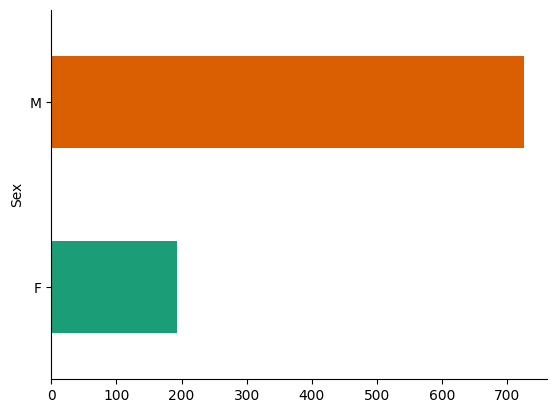

In [ ]:
# @title Sex

import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

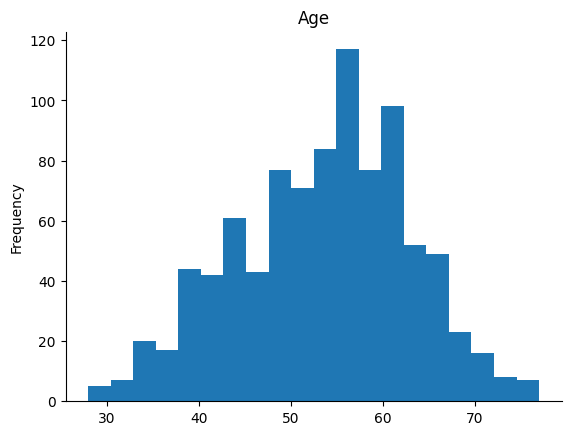

In [ ]:
# @title Age

df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Разделяем на тренировочные и тестовые данные

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='HeartDisease'),df['HeartDisease'],test_size=0.2,random_state=42)

In [ ]:
# Находим категориальные признаки

categorials = X_train.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
# отфильтруем непрерывные признаки
integer = X_train.select_dtypes(['int', 'float']).columns.tolist()
X_train[integer].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
795,42,120,240,1,194,0.8
25,36,130,209,0,178,0.0
84,56,150,213,1,125,1.0
10,37,130,211,0,142,0.0
344,51,120,0,1,104,0.0


In [ ]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials,dtype=int)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials, dtype=int)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([X_test[integer].fillna(-999), dummy_test], axis=1)

In [ ]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_NAP,Sex_M,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_TA,Sex_F,ST_Slope_Up,RestingECG_LVH,ChestPainType_ASY,ChestPainType_ATA,ST_Slope_Flat,RestingECG_Normal,ST_Slope_Down
795,42,120,240,1,194,0.8,1,1,0,1,0,0,0,0,0,0,0,0,1,1
25,36,130,209,0,178,0.0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
84,56,150,213,1,125,1.0,0,1,0,0,1,0,0,0,0,1,0,1,1,0
10,37,130,211,0,142,0.0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
344,51,120,0,1,104,0.0,0,1,0,1,0,0,0,0,0,1,0,1,1,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 668 to 451
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                184 non-null    int64  
 1   RestingBP          184 non-null    int64  
 2   Cholesterol        184 non-null    int64  
 3   FastingBS          184 non-null    int64  
 4   MaxHR              184 non-null    int64  
 5   Oldpeak            184 non-null    float64
 6   ChestPainType_NAP  184 non-null    int64  
 7   Sex_M              184 non-null    int64  
 8   RestingECG_ST      184 non-null    int64  
 9   ExerciseAngina_N   184 non-null    int64  
 10  ExerciseAngina_Y   184 non-null    int64  
 11  ChestPainType_TA   184 non-null    int64  
 12  Sex_F              184 non-null    int64  
 13  ST_Slope_Up        184 non-null    int64  
 14  RestingECG_LVH     184 non-null    int64  
 15  ChestPainType_ASY  184 non-null    int64  
 16  ChestPainType_ATA  184 non-nu

In [ ]:
#Дерево решений
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_leaf=10, max_depth=5, random_state=10)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=10)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184



In [ ]:
#Беггинг дерева решений
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier()).fit(X_train, y_train)

y_pred = bagging.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [ ]:
#Случайный лес
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=14,min_samples_split=2, random_state=10) #max_features n_estimators
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, random_state=10)

In [ ]:
y_pred=clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
#Беггинг случайного леса
bagging = BaggingClassifier(RandomForestClassifier()).fit(X_train, y_train)

y_pred = bagging.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
#Бустинг
from sklearn.ensemble import HistGradientBoostingClassifier

boosting = HistGradientBoostingClassifier(max_iter=100)
boosting.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [ ]:
y_pred=boosting.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [ ]:
#Стекинг  tree.DecisionTreeClassifier,  ensemble.RandomForestClassifier, svm.LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC


estimators = [('linearsvc', LinearSVC(random_state=10, tol=1e-05)),('clf',DecisionTreeClassifier(min_samples_leaf=10, max_depth=5, random_state=10)),('clf_rf', RandomForestClassifier(max_depth=14,random_state=10))]

final_estimator = RandomForestClassifier(max_depth=14,min_samples_split=2, random_state=10)

reg = StackingClassifier(

    estimators=estimators,

    final_estimator=final_estimator)

reg.fit(X_train, y_train)



StackingClassifier(estimators=[('linearsvc',
                                LinearSVC(random_state=10, tol=1e-05)),
                               ('clf',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_leaf=10,
                                                       random_state=10)),
                               ('clf_rf',
                                RandomForestClassifier(max_depth=14,
                                                       random_state=10))],
                   final_estimator=RandomForestClassifier(max_depth=14,
                                                          random_state=10))

In [ ]:
y_pred=reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Все модели (Дерево решений, Случайный лес, Стекинг) показали хорошие близкие метрики (accuracy 0.88-0.89), чуть лучше был случайный лес. Беггинг в  данном примере разочаровал, при его применении метрики пусть и немного, но ухудшались.